<a href="https://colab.research.google.com/github/AlienX77-cmd/Machine-Learning-Practice-Project/blob/main/ML_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

###*Using diabetes.csv file*

In [3]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


##**Data Collection and Data Pre-Processing**

In [4]:
diabetes_data = pd.read_csv('/content/diabetes.csv')

In [5]:
# Showing first five rows of the data frame
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Showing the numbers of rows (data points) and columns (features) 
diabetes_data.shape

(768, 9)

In [8]:
# Showing the Statistical measures of the data
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

###*The values of outcome feature aren't well distributed*

0 --> Non-Diabetic

1 --> Diabetic

In [10]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


###**- Seperating the data and target(outcome)**

In [13]:
# Let X = data and Y = target (outcome)
X = diabetes_data.drop(columns="Outcome", axis=1)
Y = diabetes_data['Outcome']

In [14]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [15]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


###**- Splitting data into Training data and Test data**

In [17]:
# stratify = Y so that the outcome value will be well distributed into training and testing data when using train test split function
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
# test_size = 0.2 means that 20% of data will be in test data and 80% of data is training data

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


##**Support Vector Machine Model Training**

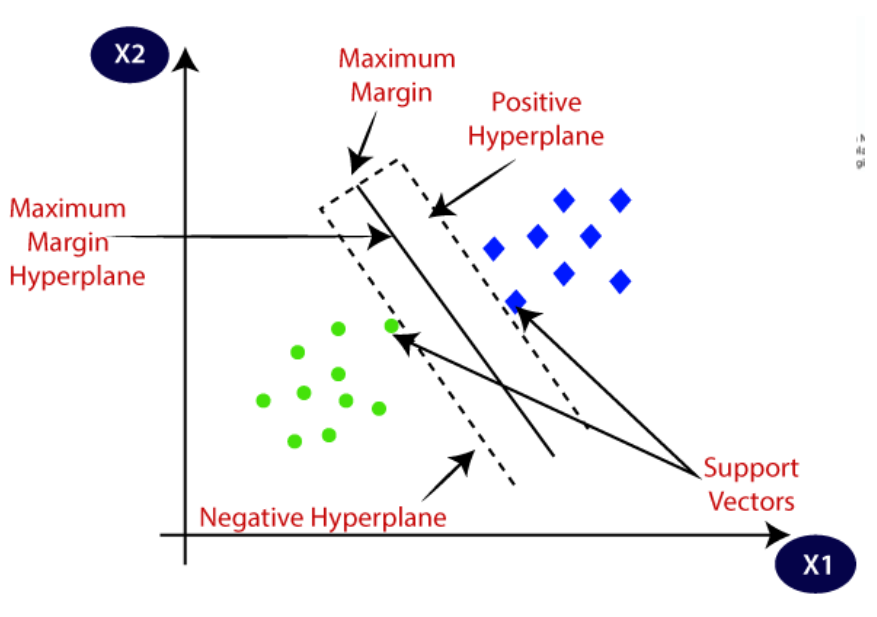

In [19]:
classifier = svm.SVC(kernel = 'linear')

In [20]:
#training the SVM classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

##**Model Evaluation with Accuracy Score**

In [25]:
# Accuracy Score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy score of the training data :", training_data_accuracy)
print("Accuracy score of the training data in percentage :", training_data_accuracy*100)

Accuracy score of the training data : 0.7833876221498371
Accuracy score of the training data in percentage : 78.33876221498372


In [27]:
# Accuracy Score on the training data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy score of the test data :", test_data_accuracy)
print("Accuracy score of the test data in percentage :", test_data_accuracy*100)

Accuracy score of the test data : 0.7727272727272727
Accuracy score of the test data in percentage : 77.27272727272727


##**Predictive System**

In [28]:
input_data = (5,166,72,19,175,25.8,0.587,51)
# the answer is [1] (diabete)

# Chaning the input_data to numpy array
input_numpy = np.asarray(input_data)

# Reshape the array as we are prediciting for on data point, so that our model isn't confused
input_reshaped = input_numpy.reshape(1,-1)

prediction = classifier.predict(input_reshaped)
print(prediction) #gives the result in array

if (prediction[0] == 1):
  print("The person has diabete.")
else:
  print("The person doesn't have diabete.")

[1]
The person has diabete.


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
